In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df=pd.read_csv(r'G:\My Drive\Mysidework documents\Untitled Correlation.csv')

In [80]:
df.head()

,SHID,Geography,Obesity Among Adults,No Leisure-Time Physical Activity Among Adults
0,country:us/tract:48441011400,Tract 48441011400,33.9,27.1
1,country:us/tract:48441011300,Tract 48441011300,37.2,33.3
2,country:us/tract:48441013300,Tract 48441013300,30.8,22.8
3,country:us/tract:48441011700,Tract 48441011700,36.4,34.6
4,country:us/tract:48441012900,Tract 48441012900,29.9,17.8


In [81]:
df.shape

(37, 4)

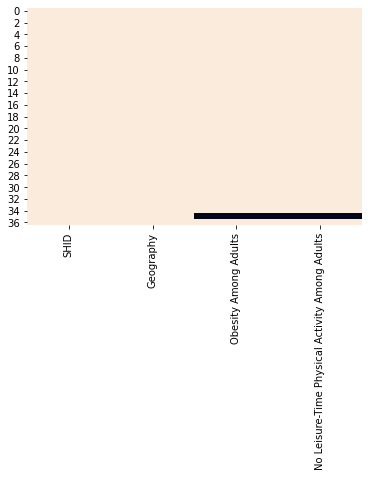

In [82]:
sns.heatmap(df.notnull(),cbar=False)

In [83]:
df.dropna(inplace=True,axis=0)

In [84]:
df.shape

(36, 4)

In [85]:
df.drop(['SHID','Geography'],inplace=True,axis=1)

In [86]:
df.describe()

,Obesity Among Adults,No Leisure-Time Physical Activity Among Adults
count,36.000000,36.000000
mean,33.805556,28.041667
std,5.455793,7.187186
min,21.500000,17.200000
25%,29.850000,22.500000
50%,33.400000,27.050000
75%,37.400000,33.325000
max,51.800000,48.400000


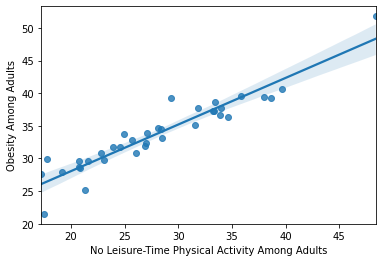

In [87]:
sns.regplot(df['No Leisure-Time Physical Activity Among Adults'],df['Obesity Among Adults'])

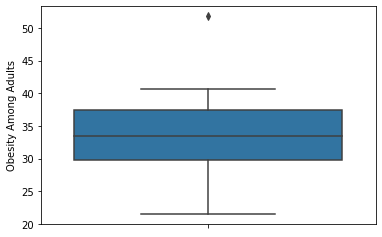

In [88]:
sns.boxplot(y=df['Obesity Among Adults'])

In [91]:
Q1=df.quantile(0.25)

Q3=df.quantile(0.75)

IQR=Q3-Q1

df=df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [92]:
corr=df.corr()

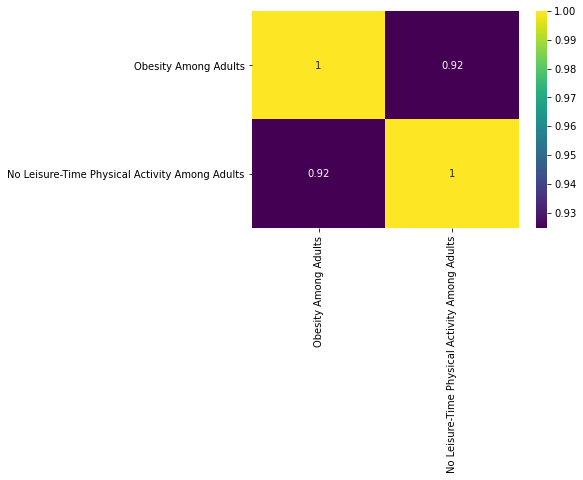

In [93]:
sns.heatmap(corr,cmap='viridis',annot=True)

In [94]:
df.rename(columns={'No Leisure-Time Physical Activity Among Adults':'No_Leisure_Time_Physical_Activity',
                      'Obesity Among Adults':'Obesity'},inplace=True)

## 1st method

In [95]:
y=df.iloc[:,:-1]

x=df.iloc[:,-1:]


In [96]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [98]:
lr_model=LinearRegression(normalize=True)

lr_model.fit(X_train,y_train)

LinearRegression(normalize=True)

Text(0.5, 1.0, 'Obesity Among Adults Vs. No Leisure-Time Physical Activity Among Adults (Training set)')

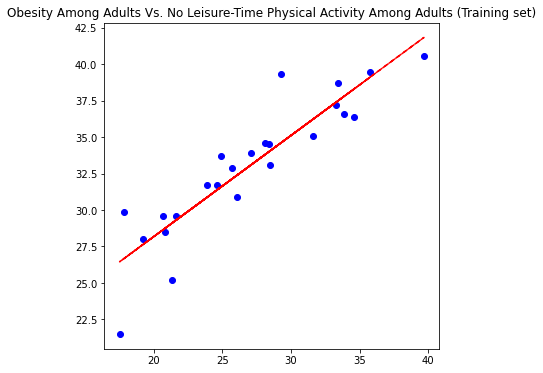

In [99]:
plt.figure(figsize=(6,6))

plt.scatter(X_train,y_train,color='blue')

plt.plot(X_train,lr_model.predict(X_train),color='red',linestyle = "--" )

plt.title('Obesity Among Adults Vs. No Leisure-Time Physical Activity Among Adults (Training set)')

Text(0.5, 1.0, 'Obesity Among Adults Vs. No Leisure-Time Physical Activity Among Adults (Test set)')

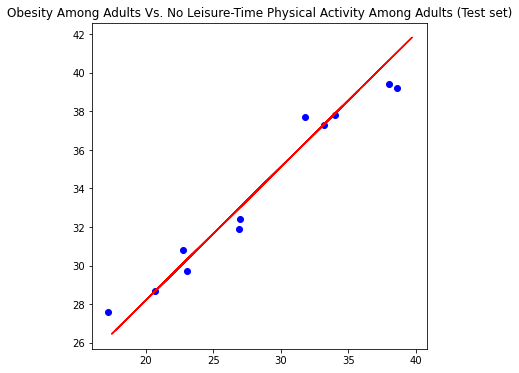

In [100]:
plt.figure(figsize=(6,6))

plt.scatter(X_test,y_test,color='blue')

plt.plot(X_train,lr_model.predict(X_train),color='red')

plt.title('Obesity Among Adults Vs. No Leisure-Time Physical Activity Among Adults (Test set)')

In [101]:
print(lr_model.intercept_)

print(lr_model.coef_)

[14.32097441]
[[0.69310993]]


In [102]:
from sklearn.metrics import r2_score

In [103]:
lr_model.score(X_test, y_test)

0.9442383336806514

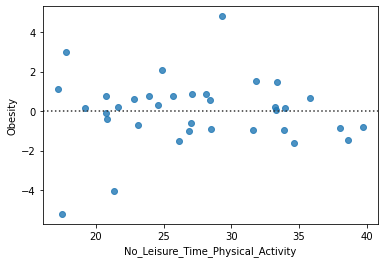

In [104]:
sns.residplot(df['No_Leisure_Time_Physical_Activity'],df['Obesity'])

### 2nd method

In [105]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [106]:
model = ols("Obesity ~ No_Leisure_Time_Physical_Activity", data=df).fit()

In [107]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     194.2
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           2.22e-15
Time:                        15:21:00   Log-Likelihood:                -68.543
No. Observations:                  35   AIC:                             141.1
Df Residuals:                      33   BIC:                             144.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

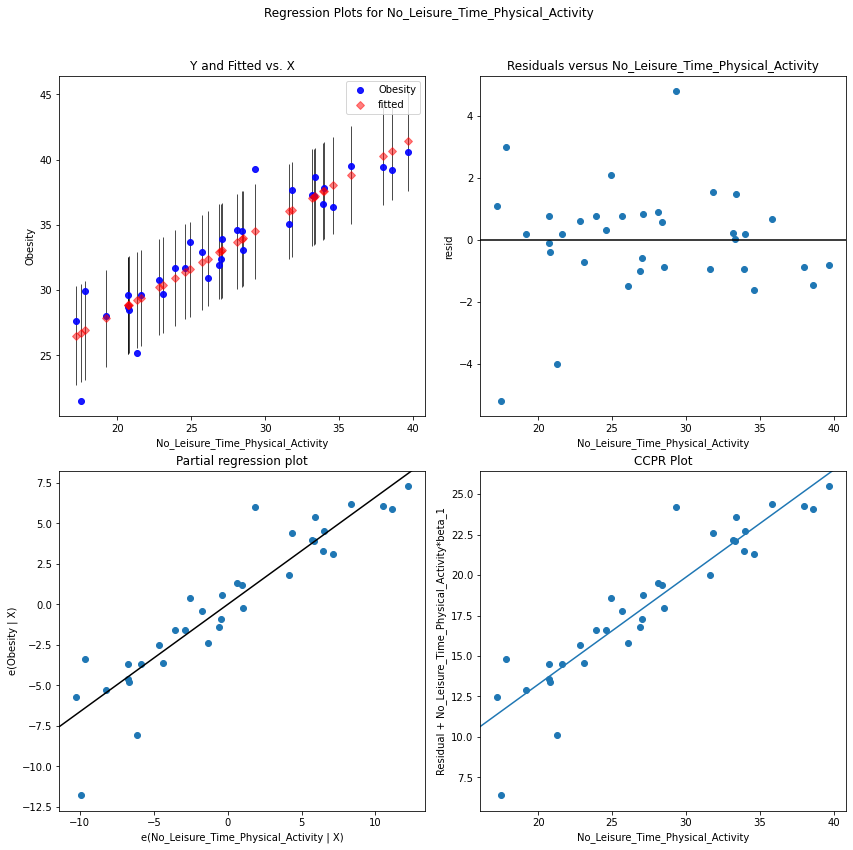

In [108]:
fig = plt.figure(figsize=(12,12))

fig = sm.graphics.plot_regress_exog(model, "No_Leisure_Time_Physical_Activity", fig=fig)

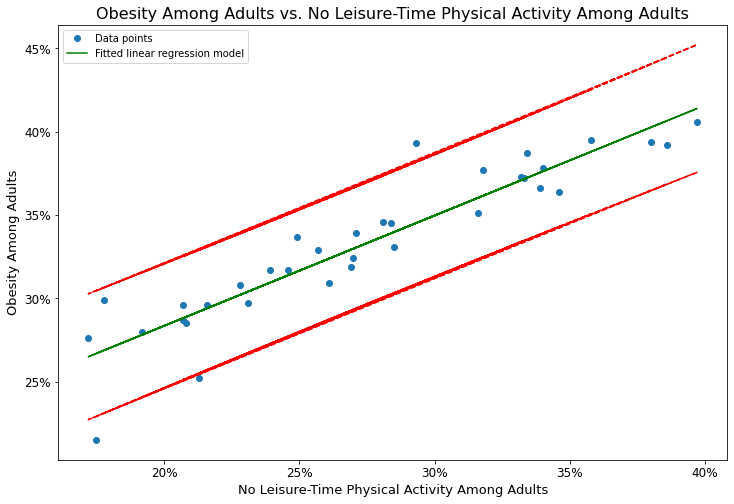

In [109]:
x = df['No_Leisure_Time_Physical_Activity']

y = df['Obesity']

_,interval_l, interval_u=wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, y, 'o', label="Data points")

ax.plot(x, model.fittedvalues, 'g', label="Fitted linear regression model")

ax.plot(x,interval_u, 'r--')

ax.plot(x, interval_l, 'r--')

ax.set_xlabel('No Leisure-Time Physical Activity Among Adults',fontsize=13)

ax.set_ylabel('Obesity Among Adults',fontsize=13)

ax.set_title('Obesity Among Adults vs. No Leisure-Time Physical Activity Among Adults',fontsize=16)

y_value=['{:,.0f}'.format(x) + '%' for x in ax.get_yticks()]

ax.set_yticklabels(y_value)

x_value=['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]

ax.set_xticklabels(x_value)

plt.tick_params(labelsize=12)

ax.legend(loc='best');